# Project: Investigate the Dataset from TMDb

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I will analyse the TMDb dataset in order to figure out:
* what are the most popular genres over the years
* what are the characteristic of the most profitable movies
* do most popular genre make more profit

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
row, columns = df.shape
print("There's {} movies in the dataset and {} columns.".format(row-1, columns))
print("There's {} duplicate(s) movie(s).".format(sum(df.duplicated())))

There's 10865 movies in the dataset and 21 columns.
There's 1 duplicate(s) movie(s).


In [4]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There's null value in:
* imdb_id
* cast
* homepage
* director
* tagline
* keywords
* overview
* genres
* production_companies

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Some remarks about the numerical values:
* the financials columns contain 0 (revenue, budget, revenue_adj, budget_adj)
* the release year spread from 1960 to 2015, so we must use the adjusted financials columns if we want to include financials figures in our analysis.
* the vote average should be correlate with vote count since that later is skewed to the right
* the second, third and fourth quartile of the runtime are well distributed. Some futher investigation might be interestint to see if, despite the wrong value (0 and 900 minutes are obviously wrong), the distribution is normal. 

### Data Cleaning

Following cleaning will be done:
* Removing the rows 
  - duplicates
  - containing 0 in the financials columns (since settings those to the mean is not relevant)
* Removing columns
  - irrelevant for the exploratory analysis
  - with null values
  - that are correlated

In [6]:
# remvoving duplicates
df.drop_duplicates(inplace=True)
print("Number of movies after removing duplicates: {}.".format(df.shape[0] - 1))

Number of movies after removing duplicates: 10864.


In [7]:
# removing rows with 0
df = df[(df != 0).all(1)]
print("Number of movies after removing '0' values: {}.".format(df.shape[0] - 1))

Number of movies after removing '0' values: 3853.


In [8]:
# removing colums not relevant
df.drop(['id','imdb_id','cast','homepage','keywords','tagline','production_companies','overview','release_date','budget','revenue'], axis=1, inplace=True)
print("Number of columns after removing irrelevant column: {}.".format(df.shape[1]))

Number of columns after removing irrelevant column: 10.


In [9]:
# removing columns with null
df.dropna(inplace=True)
df.isnull().sum()

popularity        0
original_title    0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [10]:
df.head(2)

,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


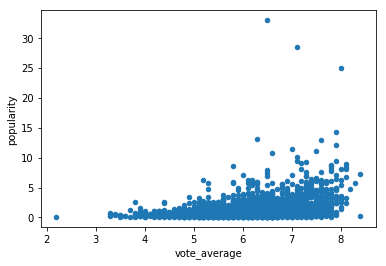

In [11]:
df.plot.scatter(x='vote_average', y='popularity');

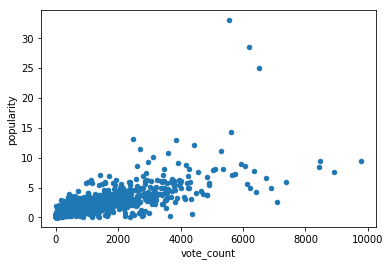

In [12]:
df.plot.scatter(x='vote_count', y='popularity');

From the two graphs, we see that there's a positive correlation between popularity and vote_average from one side and popularity and vote_count on the other side. So for further analysis over popularity we can drop the columns related to votes.

In [13]:
# Removing correlated columns
df.drop(['vote_count','vote_average'], axis=1, inplace=True)
print("Number of columns after removing correlated columns: {}.".format(df.shape[1]))

Number of columns after removing correlated columns: 8.


In [14]:
# Add a column 'profit'
df = df.assign(profit_adj=df.revenue_adj-df.budget_adj)

In [15]:
# A look over the final data frame
df.head(5)

,popularity,original_title,director,runtime,genres,release_year,budget_adj,revenue_adj,profit_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09,1.210949e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which genres are most popular from decade to decade?

In [16]:
# Split the dataframe by genre
genre = df['genres'].str.split('|').apply(pd.Series).stack()
genre.index = genre.index.droplevel(-1)
genre.name = 'genre'
df_by_genre = df.join(genre)
del df_by_genre['genres']
df_by_genre.head()


,popularity,original_title,director,runtime,release_year,budget_adj,revenue_adj,profit_adj,genre
0,32.985763,Jurassic World,Colin Trevorrow,124,2015,1.379999e+08,1.392446e+09,1.254446e+09,Action
0,32.985763,Jurassic World,Colin Trevorrow,124,2015,1.379999e+08,1.392446e+09,1.254446e+09,Adventure
0,32.985763,Jurassic World,Colin Trevorrow,124,2015,1.379999e+08,1.392446e+09,1.254446e+09,Science Fiction
0,32.985763,Jurassic World,Colin Trevorrow,124,2015,1.379999e+08,1.392446e+09,1.254446e+09,Thriller
1,28.419936,Mad Max: Fury Road,George Miller,120,2015,1.379999e+08,3.481613e+08,2.101614e+08,Action


In [17]:
# group the dataframe by release decades for a better display
bin_edges= [1960,1970,1980,1990,2000,2010,2015]
bin_labels= ['1960s', '1970s', '1980s', '1990s', '2000s','2010s']
df_by_genre['release_decade']= pd.cut(df['release_year'],bin_edges,labels=bin_labels) 
df_by_genre.head()

,popularity,original_title,director,runtime,release_year,budget_adj,revenue_adj,profit_adj,genre,release_decade
0,32.985763,Jurassic World,Colin Trevorrow,124,2015,1.379999e+08,1.392446e+09,1.254446e+09,Action,2010s
0,32.985763,Jurassic World,Colin Trevorrow,124,2015,1.379999e+08,1.392446e+09,1.254446e+09,Adventure,2010s
0,32.985763,Jurassic World,Colin Trevorrow,124,2015,1.379999e+08,1.392446e+09,1.254446e+09,Science Fiction,2010s
0,32.985763,Jurassic World,Colin Trevorrow,124,2015,1.379999e+08,1.392446e+09,1.254446e+09,Thriller,2010s
1,28.419936,Mad Max: Fury Road,George Miller,120,2015,1.379999e+08,3.481613e+08,2.101614e+08,Action,2010s


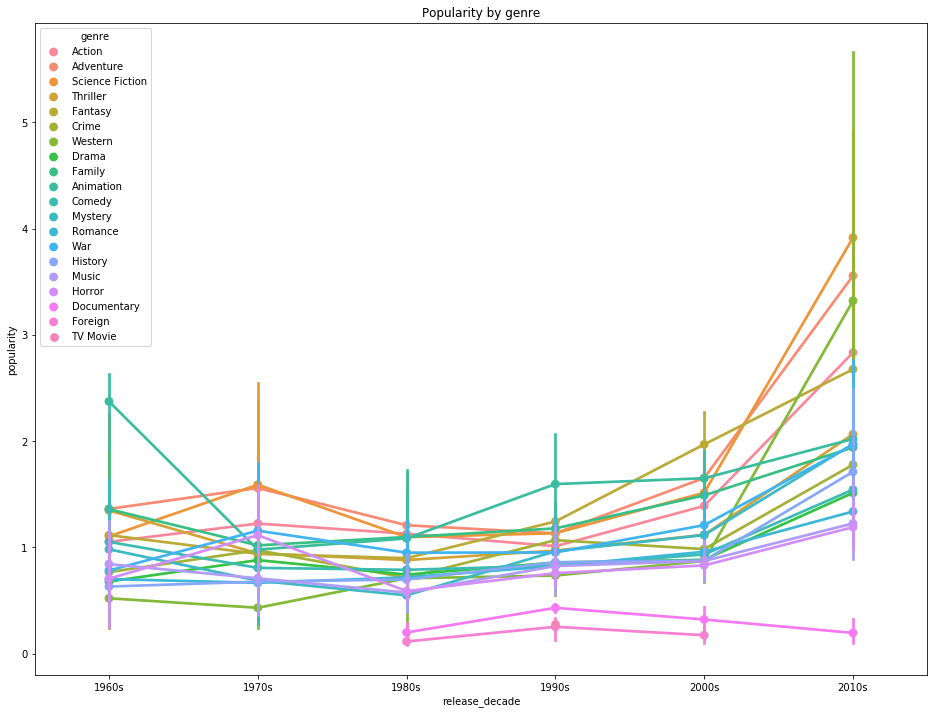

In [18]:
plt.subplots(figsize=(16,12))
plt.title('Popularity by genre')
sns.pointplot(x='release_decade', y='popularity', hue='genre', data=df_by_genre);

This graph is complete but a bit difficult to interpret due to the number of genre.
Let's focus on the top 5 genre over the decades.

In [19]:
genre_top5_by_decade = df_by_genre.groupby(['release_decade','genre'])['popularity'].mean()
df_genre_top5_by_decade = genre_top5_by_decade.to_frame('popularity').reset_index().sort_values(['release_decade','popularity'], ascending=[True,False]).groupby('release_decade').head(5)
df_genre_top5_by_decade.tail(10)

,release_decade,genre,popularity
81,2000s,Fantasy,1.968584
74,2000s,Adventure,1.652534
75,2000s,Animation,1.650196
88,2000s,Science Fiction,1.513486
80,2000s,Family,1.488658
106,2010s,Science Fiction,3.914973
93,2010s,Adventure,3.556537
109,2010s,Western,3.320649
92,2010s,Action,2.833442
100,2010s,Fantasy,2.676002


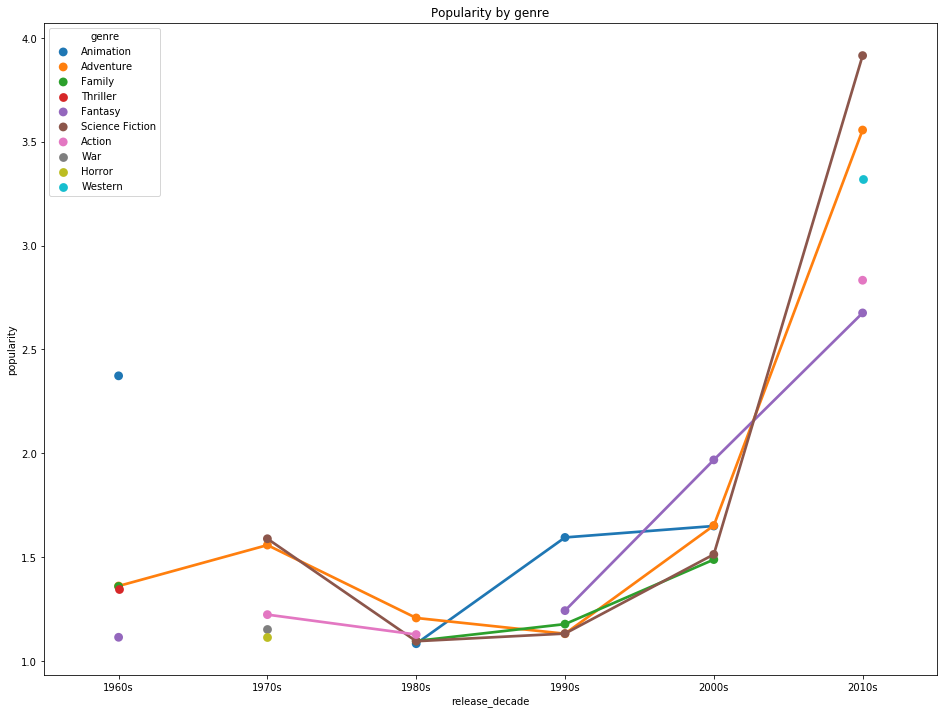

In [20]:
plt.subplots(figsize=(16,12))
plt.title('Popularity by genre')
sns.pointplot(x='release_decade', y='popularity', hue='genre', data=df_genre_top5_by_decade);

Science Fiction and Animation are the two first most popular genre of this decade.
When looking in the past, we can see that those are the most present in the top 5 over the decades and that they follow more or less the same curve.

### Research Question 2 : Characteristics of the most profitable movie

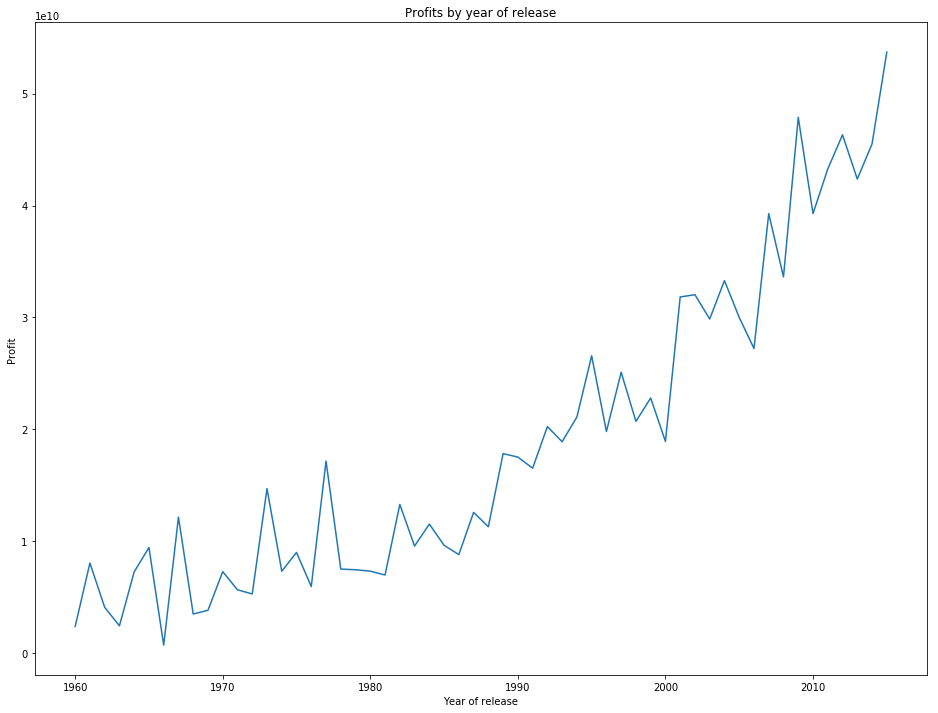

In [21]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
profits_by_year = df_by_genre.groupby('release_year')['profit_adj'].sum()
plt.figure(figsize=(16,12))
plt.title("Profits by year of release")
plt.xlabel("Year of release")
plt.ylabel("Profit")
plt.plot(profits_by_year);

In [22]:
high_profit = np.trunc(df_by_genre.describe()['profit_adj'][6])
print("We will consider highly profitable movies as being the 25% having most profit. The profit threshold is {}$.".format(high_profit))

We will consider highly profitable movies as being the 25% having most profit. The profit threshold is 120599597.0$.


In [23]:
df_high_profitable = df_by_genre[df_by_genre['profit_adj'] >= high_profit]
print("This reduce our dataset to {} movies.".format(len(df_high_profitable['original_title'].unique())))
df_high_profitable.head()

This reduce our dataset to 876 movies.


,popularity,original_title,director,runtime,release_year,budget_adj,revenue_adj,profit_adj,genre,release_decade
0,32.985763,Jurassic World,Colin Trevorrow,124,2015,1.379999e+08,1.392446e+09,1.254446e+09,Action,2010s
0,32.985763,Jurassic World,Colin Trevorrow,124,2015,1.379999e+08,1.392446e+09,1.254446e+09,Adventure,2010s
0,32.985763,Jurassic World,Colin Trevorrow,124,2015,1.379999e+08,1.392446e+09,1.254446e+09,Science Fiction,2010s
0,32.985763,Jurassic World,Colin Trevorrow,124,2015,1.379999e+08,1.392446e+09,1.254446e+09,Thriller,2010s
1,28.419936,Mad Max: Fury Road,George Miller,120,2015,1.379999e+08,3.481613e+08,2.101614e+08,Action,2010s


In [24]:
df_high_profitable.describe()

,popularity,runtime,release_year,budget_adj,revenue_adj,profit_adj
count,2575.000000,2575.000000,2575.000000,2.575000e+03,2.575000e+03,2.575000e+03
mean,2.425389,116.737864,1999.155340,8.609666e+07,4.386366e+08,3.525399e+08
std,2.591980,23.085430,13.119377,5.812805e+07,3.126370e+08,2.941697e+08
min,0.131526,69.000000,1960.000000,2.248029e+02,1.295114e+08,1.206311e+08
25%,1.106471,99.000000,1992.000000,3.838161e+07,2.340689e+08,1.668029e+08
50%,1.774018,114.000000,2002.000000,7.522756e+07,3.393612e+08,2.555496e+08
75%,2.911727,130.000000,2010.000000,1.219729e+08,5.368018e+08,4.386384e+08
max,32.985763,248.000000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09


High profit movies have an average runtime over all the decades of 114.0 minutes.
But since the last three decades we see that runtime looks more similar in terms of distribution and mean when compare to the older decades.


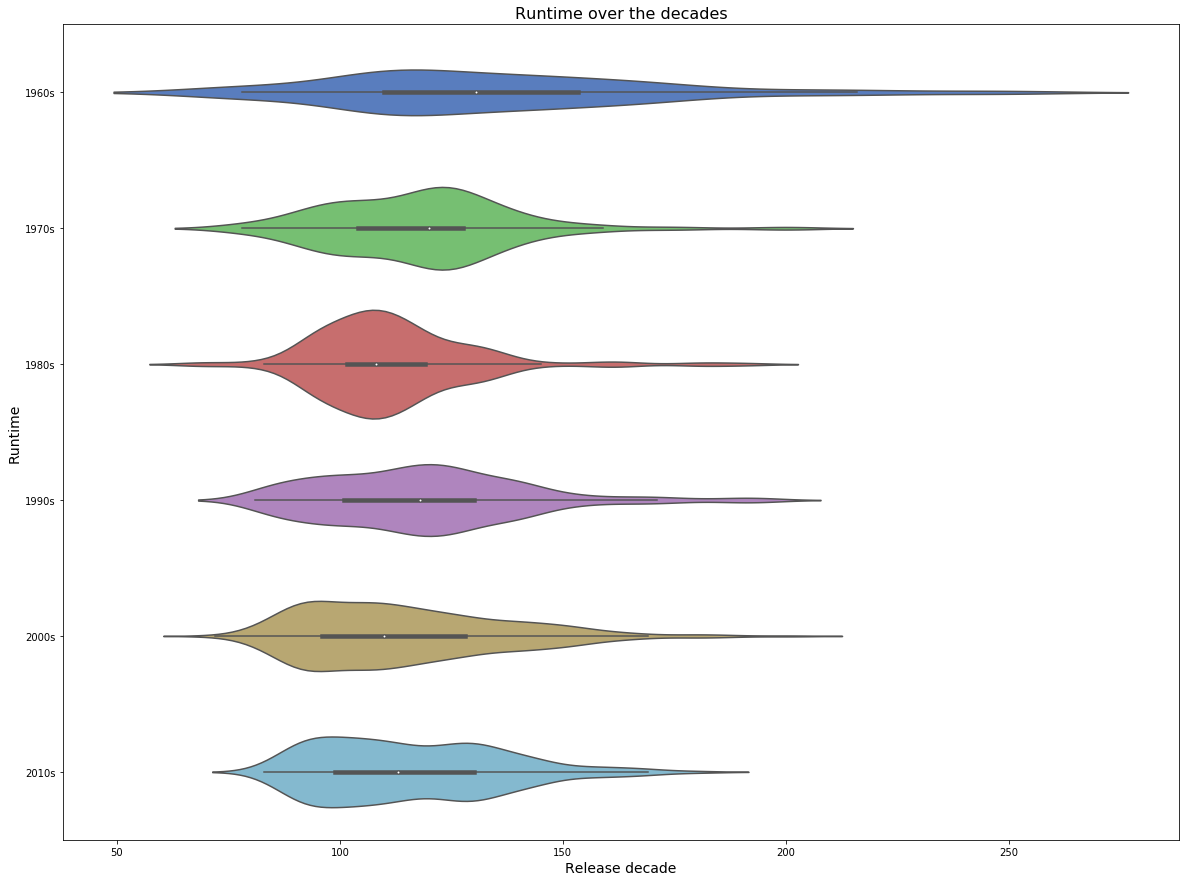

In [25]:
# Runtime characteristics
print("High profit movies have an average runtime over all the decades of {} minutes.".format(df_high_profitable.describe()['runtime'][5]))
plt.subplots(figsize=(20,15))
bplot_runtime = sns.violinplot(x="runtime", y="release_decade", data=df_high_profitable, palette="muted");
bplot_runtime.axes.set_title("Runtime over the decades", fontsize=16);
bplot_runtime.set_xlabel("Release decade", fontsize=14);
bplot_runtime.set_ylabel("Runtime", fontsize=14);
#bplot_runtime.tick_params(labelsize=10);
print("But since the last three decades we see that runtime looks more similar in terms of distribution and mean when compare to the older decades.")


In [26]:
print("High profit movies have an average runtime of {} minutes.".format(df_high_profitable.describe()['runtime'][5]))
print("High profit movies have an average budget of {}$.".format(np.trunc(df_high_profitable.describe()['budget_adj'][5])))

High profit movies have an average runtime of 114.0 minutes.
High profit movies have an average budget of 75227563.0$.


The top 5 most profitable directors are director
Steven Spielberg    3.446140e+10
James Cameron       2.119179e+10
George Lucas        1.694469e+10
Peter Jackson       1.556107e+10
Robert Zemeckis     1.515238e+10
Name: profit_adj, dtype: float64.


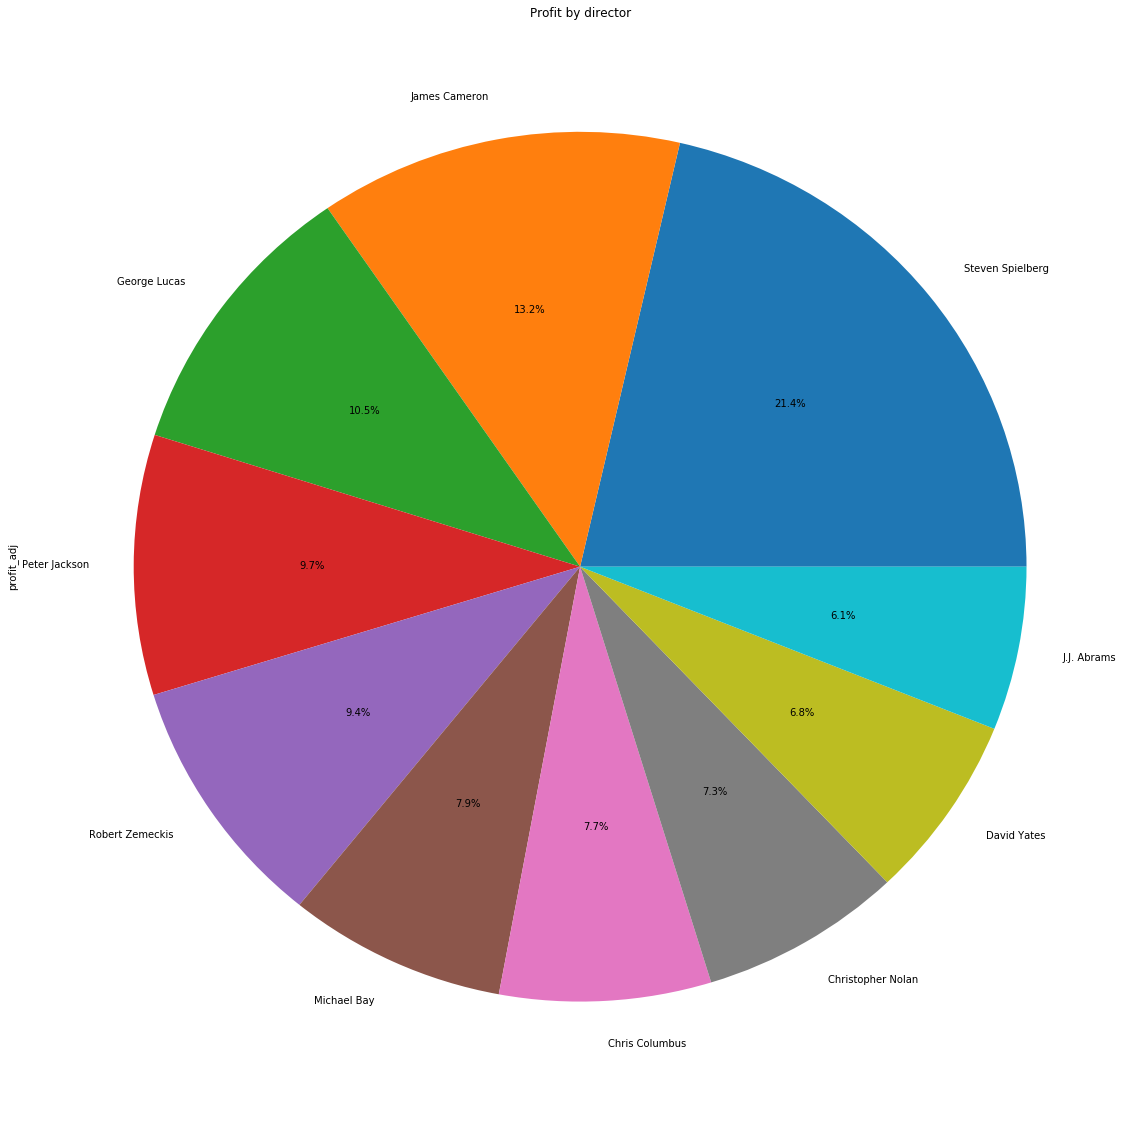

In [79]:
# The director generating the most profit
profit_director = df_high_profitable.groupby('director')['profit_adj'].sum().sort_values(ascending=False)
profit_director.head(10).plot(kind='pie', figsize=(20,20), autopct='%1.1f%%');
plt.title('Profit by director');
print("The top 5 most profitable directors are {}.".format(profit_director.head(5)));

In [28]:
# Correlation between genre and profit
profit_genre = df_high_profitable.groupby(['release_decade','genre'])['profit_adj'].sum()
df_profit_genre = profit_genre.to_frame('profit').reset_index().sort_values(['release_decade','profit'], ascending=[True,False]).groupby('release_decade').head(5)
df_profit_genre.tail(10)

,release_decade,genre,profit
69,2000s,Adventure,4.629888e+10
68,2000s,Action,3.862088e+10
76,2000s,Fantasy,3.123736e+10
71,2000s,Comedy,2.968222e+10
75,2000s,Family,2.866464e+10
87,2010s,Adventure,3.565599e+10
86,2010s,Action,3.279252e+10
99,2010s,Science Fiction,2.088786e+10
93,2010s,Fantasy,1.661042e+10
89,2010s,Comedy,1.577100e+10


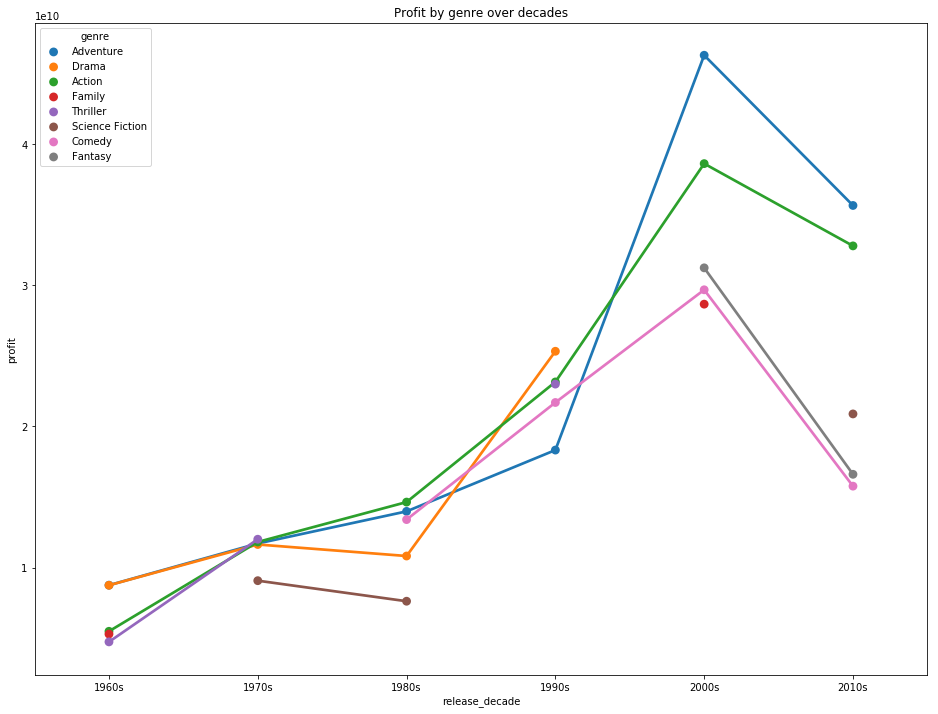

In [29]:
plt.subplots(figsize=(16,12))
plt.title('Profit by genre over decades')
sns.pointplot(x='release_decade', y='profit', hue='genre', data=df_profit_genre);

The drop in the latest decade is not significant since the dataset contains movie only to 2015 so the decade is no complete. Beside this we can see that there's no correlation between most popular genre and most profitable movie.

<a id='conclusions'></a>
## Conclusions

The main limitation of this analysis is the removal of about seven thousand movies from the dataset because of the cleaning. This means that the conclusions are based on about 35% of the dataset.

Analysis on genres indicates that over the years Science Fiction and Adventure are among the top most popular genre. Beside the popularity, Adventure is also the first genre of the most profitable movies.

Analysis on profit indicates that the average runtime is a bit less that 2 hours and the average budget is about 75 millions of dollars. The top 5 directors who have generated the highest profit are in order: Steven Spielberg, James Cameron, George Lucas, Peter Jackson and finally Robert Zemeckis; all well know for their block buster.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0